In hydrological studies, sometimes we need to download data of waterbodies. Often reliable water body data shapefiles are not easily available. In this tutorial, we demonstrate the extraction of reservoir shapefiles from openly accessible openstreetmap platform on python. Leafmap module is used for the extraction purpose.

In [1]:
import leafmap
import os
import geopandas as gpd

In [2]:
import numpy as np
import pandas as pd

In [4]:
shp_file = '' #Enter the path of your shapefile with folder structure
shp = gpd.read_file(shp_file)

In [5]:
shp_centroid = shp.centroid

In [6]:
shp.total_bounds

array([73.25, 20.75, 77.25, 24.25])

In [9]:
m = leafmap.Map(center=[75.0679, 22.3902], zoom=6)
m.add_gdf(shp, layer_name="Study Site")
m

Map(center=[75.0679, 22.3902], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

In [10]:
water = leafmap.osm_gdf_from_bbox(north = shp.total_bounds[3], south = shp.total_bounds[1], east = shp.total_bounds[2], west = shp.total_bounds[0], tags = {"water": True})
water

nodes  \
element_type osmid                                                          
way          200744374  [2107078797, 2107078655, 2107078878, 210707860...   
             200745664  [2107086934, 2107087339, 2107087069, 210708696...   
             200745665  [2107087105, 2107087754, 2107087455, 210708701...   
             200745667  [2107087412, 2107087571, 2107087530, 210708750...   
             227630595  [2362792343, 2362845825, 2362845826, 236284582...   
...                                                                   ...   
relation     7965620    [[[5378985310, 5378985288, 5378985305, 5378985...   
             7965623    [[[5378988648, 5378988680, 5378988711, 5378989...   
             9002786    [[[6075120122, 6075120121, 6075120120, 6075120...   
way          300966282  [3050747781, 3050747762, 3050747742, 305074751...   
             300967168  [3050745351, 3050756913, 3050756849, 305075681...   

                                                                 geometry  \
element_type osmid                                                          
way          200744374  POLYGON ((73.32258 20.86968, 73.32374 20.86964...   
             200745664  POLYGON ((73.31145 20.88263, 73.31052 20.88267...   
             200745665  POLYGON ((73.24611 20.90923, 73.24780 20.90831...   
             200745667  POLYGON ((73.26638 20.89721, 73.26739 20.89683...   
             227630595  POLYGON ((73.19667 21.02712, 73.19843 21.02713...   
...                                                                   ...   
relation     7965620    POLYGON ((76.87057 21.43198, 76.87082 21.43222...   
             7965623    POLYGON ((77.00793 21.61977, 77.00793 21.61982...   
             9002786    POLYGON ((76.88236 21.60109, 76.88251 21.60141...   
way          300966282  POLYGON ((76.85314 20.89451, 76.85340 20.89385...   
             300967168  POLYGON ((77.02294 20.85468, 77.02363 20.85313...   

                       natural      water name source:position source:tracer  \
element_type osmid                                                             
way          200744374   water      river  NaN             NaN           NaN   
             200745664   water      river  NaN             NaN           NaN   
             200745665   water      river  NaN             NaN           NaN   
             200745667   water      river  NaN             NaN           NaN   
             227630595   water      river  NaN             NaN           NaN   
...                        ...        ...  ...             ...           ...   
relation     7965620     water  reservoir  NaN          MapBox    scanaerial   
             7965623     water  reservoir  NaN            Bing    scanaerial   
             9002786     water      river  NaN             NaN           NaN   
way          300966282   water      river  NaN             NaN           NaN   
             300967168   water      river  NaN             NaN           NaN   

                       source:zoomlevel                    ways name:de  ...  \
element_type osmid                                                       ...   
way          200744374              NaN                     NaN     NaN  ...   
             200745664              NaN                     NaN     NaN  ...   
             200745665              NaN                     NaN     NaN  ...   
             200745667              NaN                     NaN     NaN  ...   
             227630595              NaN                     NaN     NaN  ...   
...                                 ...                     ...     ...  ...   
relation     7965620                 13  [557746415, 557746410]     NaN  ...   
             7965623                 17  [557746538, 557746527]     NaN  ...   
             9002786                NaN  [646668432, 642514892]     NaN  ...   
way          300966282              NaN                     NaN     NaN  ...   
             300967168              NaN                     NaN

In [1]:
#To save the extracted data as a pickle file, uncomment codes below
# import pickle
# filehandler = open('./waterbodies__20220803.pkl',"wb")
# pickle.dump(water, filehandler)



In [ ]:
#To load the saved pickle file, uncomment below code
# import pickle
# water2 = pickle.load('./waterbodies__20230117.pkl')

In [16]:
water.head()

nodes  \
element_type osmid                                                          
way          200744374  [2107078797, 2107078655, 2107078878, 210707860...   
             200745664  [2107086934, 2107087339, 2107087069, 210708696...   
             200745665  [2107087105, 2107087754, 2107087455, 210708701...   
             200745667  [2107087412, 2107087571, 2107087530, 210708750...   
             227630595  [2362792343, 2362845825, 2362845826, 236284582...   

                                                                 geometry  \
element_type osmid                                                          
way          200744374  POLYGON ((73.32258 20.86968, 73.32374 20.86964...   
             200745664  POLYGON ((73.31145 20.88263, 73.31052 20.88267...   
             200745665  POLYGON ((73.24611 20.90923, 73.24780 20.90831...   
             200745667  POLYGON ((73.26638 20.89721, 73.26739 20.89683...   
             227630595  POLYGON ((73.19667 21.02712, 73.19843 21.02713...   

                       natural  water name source:position source:tracer  \
element_type osmid                                                         
way          200744374   water  river  NaN             NaN           NaN   
             200745664   water  river  NaN             NaN           NaN   
             200745665   water  river  NaN             NaN           NaN   
             200745667   water  river  NaN             NaN           NaN   
             227630595   water  river  NaN             NaN           NaN   

                       source:zoomlevel ways name:de  ... man_made area  \
element_type osmid                                    ...                 
way          200744374              NaN  NaN     NaN  ...      NaN  NaN   
             200745664              NaN  NaN     NaN  ...      NaN  NaN   
             200745665              NaN  NaN     NaN  ...      NaN  NaN   
             200745667              NaN  NaN     NaN  ...      NaN  NaN   
             227630595              NaN  NaN     NaN  ...      NaN  NaN   

                       tunnel tourism addr:city is_in stagnation:reason  \
element_type osmid                                                        
way          200744374    NaN     NaN       NaN   NaN               NaN   
             200745664    NaN     NaN       NaN   NaN               NaN   
             200745665    NaN     NaN       NaN   NaN               NaN   
             200745667    NaN     NaN       NaN   NaN               NaN   
             227630595    NaN     NaN       NaN   NaN               NaN   

                       stagnation:type addr:postcode wheelchair  
element_type osmid                                               
way          200744374             NaN           NaN        NaN  
             200745664             NaN           NaN        NaN  
             200745665             NaN           NaN        NaN  
             200745667             NaN           NaN        NaN  
             227630595             NaN           NaN        NaN  

[5 rows x 30 columns]

In [17]:
type(water)

geopandas.geodataframe.GeoDataFrame

Check properties of our extraction

In [27]:
water.columns

Index(['nodes', 'geometry', 'natural', 'water', 'name', 'source:position',
       'source:tracer', 'source:zoomlevel', 'ways', 'name:de', 'name:es',
       'type', 'wikidata', 'source', 'seasonal', 'intermittent', 'alt_name',
       'layer', 'note', 'bridge', 'man_made', 'area', 'tunnel', 'tourism',
       'addr:city', 'is_in', 'stagnation:reason', 'stagnation:type',
       'addr:postcode', 'wheelchair'],
      dtype='object')

In [36]:
water.name

element_type  osmid    
way           200744374    NaN
              200745664    NaN
              200745665    NaN
              200745667    NaN
              227630595    NaN
                          ... 
relation      7965620      NaN
              7965623      NaN
              9002786      NaN
way           300966282    NaN
              300967168    NaN
Name: name, Length: 1645, dtype: object

Select reservoirs from our extraction

In [40]:
reservoir = water[water.water == 'reservoir']

In [41]:
reservoir.columns

Index(['nodes', 'geometry', 'natural', 'water', 'name', 'source:position',
       'source:tracer', 'source:zoomlevel', 'ways', 'name:de', 'name:es',
       'type', 'wikidata', 'source', 'seasonal', 'intermittent', 'alt_name',
       'layer', 'note', 'bridge', 'man_made', 'area', 'tunnel', 'tourism',
       'addr:city', 'is_in', 'stagnation:reason', 'stagnation:type',
       'addr:postcode', 'wheelchair'],
      dtype='object')

In [44]:
list(reservoir.name)

[nan,
 'Ukāi Reservoir',
 nan,
 nan,
 nan,
 nan,
 nan,
 'Kasbin Talav',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Kund',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 

Extract our reservoirs of interest

In [45]:
ukai_res = reservoir[reservoir.name == 'Ukāi Reservoir']
sardar_sarovar_res = reservoir[reservoir.name == 'Sardar Sarovar Dam Reservoir']
indira_sagar_res = reservoir[reservoir.name == 'Indira Sagar']

<AxesSubplot:>

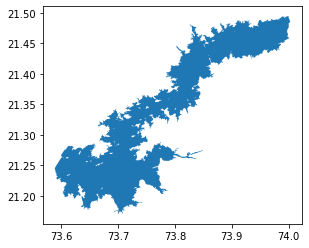

In [47]:
ukai_res.plot()

<AxesSubplot:>

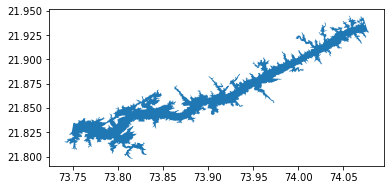

In [48]:
sardar_sarovar_res.plot()

<AxesSubplot:>

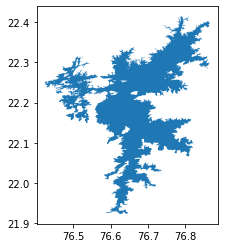

In [49]:
indira_sagar_res.plot()

In [71]:
#Get selected reservoirs

res_sel_list = ['Ukāi Reservoir', 'Sardar Sarovar Dam Reservoir', 'Indira Sagar']
res_sel = reservoir[(((reservoir.name == res_sel_list[0]) + 
                      (reservoir.name == res_sel_list[1])) + 
                     (reservoir.name == res_sel_list[2]))]

<AxesSubplot:>

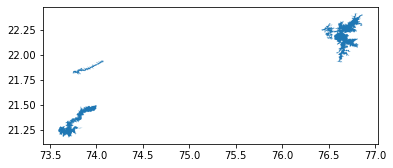

In [73]:
res_sel.plot()